# Project: Investigating Appointment No Show Dataset.

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## 1. Introduction

> This dataset provides information of 100k medical appointment in brazil and gives the result of wheather or not they showed up for their appointment. Additionally, some characterisitics of these patients have also been provided, and we are tasked to find what characteristicks encourage showing up or not showing up for the appointment.
> These characteristics include:

> 1. Gender = male or female.
> 2. Neighborhood indicates the location of the hospital.
> 3. Age = How old is the patient.
> 4. Hipertension = True or False
> 5. Diabetes= True or False
> 6. Alcoholism = True or False
> 7. Handcap = True or False
> 8. SMS_received = Messages sent to the patient.
> 9. No-show = True or False.
> 10. Scholarship = yes or No.

> **As such, these are the questions we aim at answering in this analysis:**

> 1. What Gender has a Higher chance of showing up to an appointment on average? By how much?
> 2. What facors are important for us to know in order to predict if a patient will show up for their apointment?
> 3. What number by age with diabetes were a show/no show for their appointment?

In [433]:
#Importing packages to be used.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline




<a id='wrangling'></a>
## 2. Data Wrangling

> Here we will load the dataset, look for inconsistencies, duplicates, missing values, and drop columns that we will not need in asnwering the questions.

### 2.1 General Properties

In [434]:
#Loading dataset and printing out a few lines.

df_noshow = pd.read_csv ('noshowappointments-kagglev2-may-2016.csv')
df_noshow.head()


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [435]:
#Checking the number of rows and colums in the dataset
df_noshow.shape 

(110527, 14)

> Here we have a total of 110527 samples of patients, each with 14 attributes.

In [436]:
#Looking at the brief statistical information on the dataset
df_noshow.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [437]:
#Checking if there are any dulicates in the dataset
df_noshow.duplicated().sum().any() #False output shows there is no duplicated data

False

> Fase Output Indicates that there are no Duplicates in the Dataset

In [438]:
#Checking for misssing values in the dataset
df_noshow.isnull().sum().any()  #False output indicate that there are no missing values to be filled

False

>False output indicates that there are no Missing Values

In [439]:
#Cheking the general info on the data
df_noshow.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [440]:
#Looking at the column data types
df_noshow.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

The PatientId is a a float, we have to change that to an integer

### 2.2 Data Cleaning

### 2.2.1 Initial Observations
> 1. There are typing errors in the columns, and they should all be changed to lowercase
> 2. There are no missing values or duplicates in the data
> 3. The Minimum age is -1 which is impossible, this needs looking into
> 4. The patientId and AppointmentID are sysyem genearted numbers, that we will not use
> 5. There Handicup coloumn has a mximum value of 4, it should only have 0 = False and 1 = True
> 6. The scholarship,hypertension,diabetes,alcoholism,handicap.sms_received are intergers and they should be converted into boolean, so that it is only True/False

#### Obseravtion 1

In [441]:
df_noshow.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

In [442]:
#Correcting Column labels splelling and chaning them to lowercase
df_noshow.columns = ['patient_id','appointment_id','gender', 'scheduled_day','appointment_day','age','neighbourhood','scholarship', 'hypertension', 'diabetes', 'alcoholism', 'handicap', 'sms_received', 'show']

#Confirming the changes has been effected
df_noshow.head(1)

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


#### Observation 2

In [443]:
#Droping samples with negative age
df_noshow.drop(df_noshow[df_noshow.age < 0].index)


,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No


> It appears there was only 1 sample with age < 0

#### Observation 3

In [444]:
#Dropping the appointment_id and patient_id columns

df_noshow.drop(['patient_id','appointment_id'],axis = 1, inplace = True)

In [445]:
#Checking the values of the handicap
df_noshow.nunique()

gender                  2
scheduled_day      103549
appointment_day        27
age                   104
neighbourhood          81
scholarship             2
hypertension            2
diabetes                2
alcoholism              2
handicap                5
sms_received            2
show                    2
dtype: int64

#### Observation 5

In [446]:
#Changing values greater than 1 to equal 1 in handicap
df_noshow.loc[df_noshow.handicap > 0, 'handicap'] = 1

#Checking the change has been effected
df_noshow.handicap.nunique()

2

#### Observation 6

In [447]:
#Converting int values in scholarship,hypertension,diabetes,alcoholism,handicap,sms_received to bool
df_noshow['scholarship'].apply(lambda x: True if x==1 else False).unique()
df_noshow['hypertension'].apply(lambda x: True if x==1 else False).unique()
df_noshow['diabetes'].apply(lambda x: True if x==1 else False).unique()
df_noshow['alcoholism'].apply(lambda x: True if x==1 else False).unique()
df_noshow['handicap'].apply(lambda x: True if x==1 else False).unique()
df_noshow['sms_received'].apply(lambda x: True if x==1 else False).unique()

array([False,  True])

<a id='eda'></a>
## Exploratory Data Analysis

> Since the data is now clean and consistent, we can now proceed with computing statistics and create visualizations by looking at one variable at a time.

### Research Question 1 (What facors are important for us to know in order to predict if a patient will show up for their apointment?)

> To answer this question, we will now go through each attribute in the dataset and find out how each affects whether the patient will show onr not.

### Age

In [448]:
#getting the statistical data of the Age

df_noshow['age'].describe()

count    110527.000000
mean         37.088874
std          23.110205
min          -1.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: age, dtype: float64

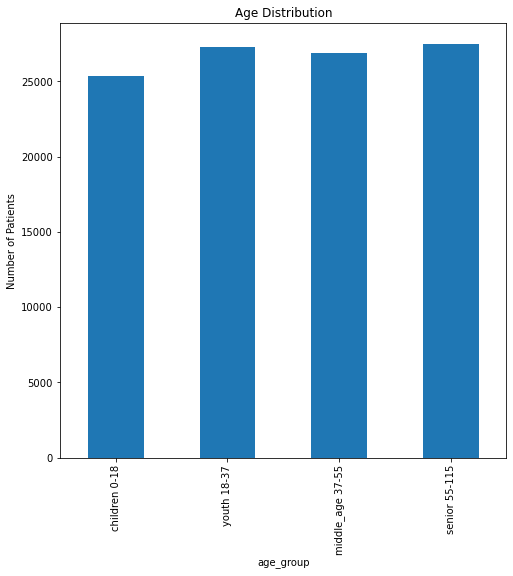

In [449]:
#Looking at the distribution of age we group them into 4 groups using the minimum, 25%,50%,75%, and 100%
df_noshow['age_group'] = pd.cut(df_noshow['age'],bins =[0,18,37,55,115], labels =['children 0-18','youth 18-37', 'middle_age 37-55', 'senior 55-115'])

#check
df_noshow.groupby(['age_group']) ['age'].count().plot (kind = 'bar',figsize =(8,8), title = 'Age Distribution', ylabel = 'Number of Patients' );

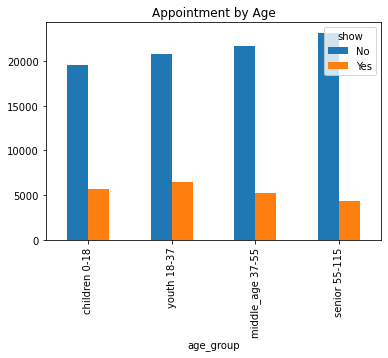

In [450]:
#Getting the number of show/no show according to tha age groups created

df_noshow.groupby(['age_group']) ['show'].value_counts().unstack().plot(kind= 'bar', title= 'Appointment by Age');

> From the Appointment by age bar chart, it is clear that the number of No Show in every age group exceeds the number of patients showing up for their appointments.

> Secondly, it also depicts that the youth aged (18 -37) have the highest rate of showing up for their appointment amongst all the other age groups.

### Gender

In [451]:
#Creating a function for plotting bar charts

def bar_plot(x):
    columns = x

    for col in columns:
        df_noshow[col].value_counts(normalize = True).plot(kind = 'bar', figsize = (15,5),)
        plt.title (col + ' vs Total Counts')
        plt.ylabel('Total Count')
        plt.xlabel(col)
      
      

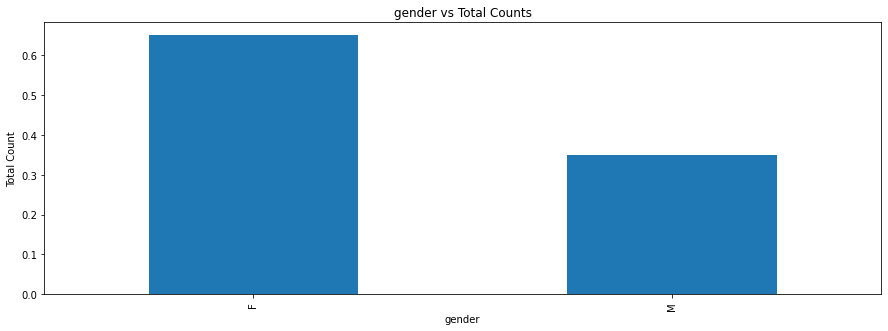

In [452]:
#Getting the number of patients by gender, using the bar_plot function
bar_plot (['gender'])

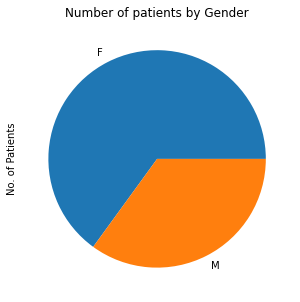

In [453]:
#plotting the number of patients by gender
df_noshow ['gender'].value_counts().plot(kind= 'pie', title = 'Number of patients by Gender',figsize = (15,5), xlabel = 'Female/Male', ylabel = 'No. of Patients');

> From the Dataset, it is clear that we have more female patients than male patients.

> Next, we will find out how many patients off each gender actually shows up for their appointment, and those that do not.

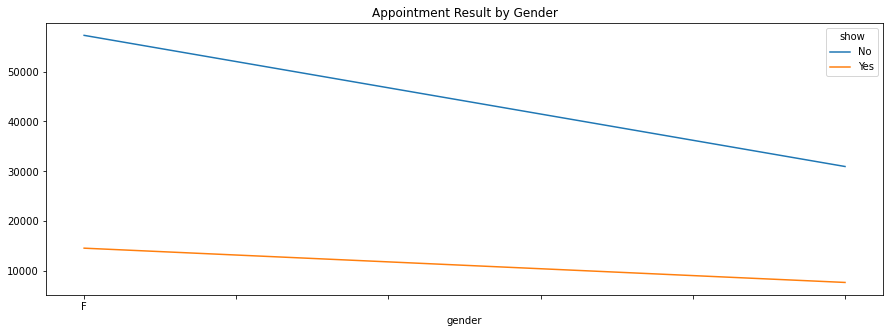

In [454]:
#Prportions of patiens showing for appointment by Gender

df_noshow.groupby(['gender']) ['show'].value_counts().unstack().plot(kind = 'line',title = 'Appointment Result by Gender', figsize = (15,5));

> Females have a higher percentage of both showing up and not showing up for their appointments.

### Diabetes

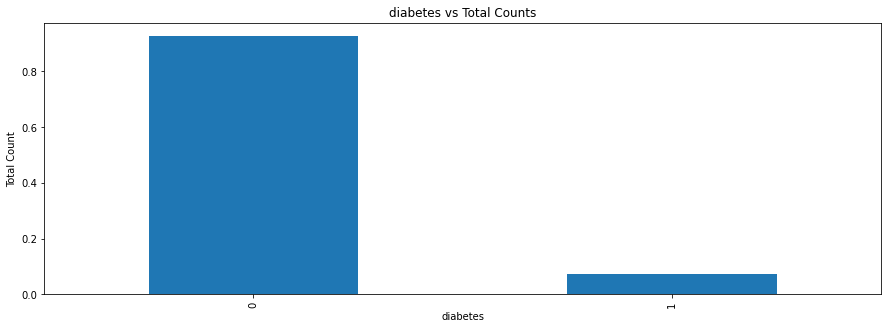

In [455]:
#Getting the number of patients with diabetes, using the bar_plot function
bar_plot (['diabetes'])

In [456]:
#Getting the number of patients with diabetes who showed for appointment
df_noshow.groupby(['diabetes'])['show'].value_counts()

diabetes  show
0         No      81695
          Yes     20889
1         No       6513
          Yes      1430
Name: show, dtype: int64

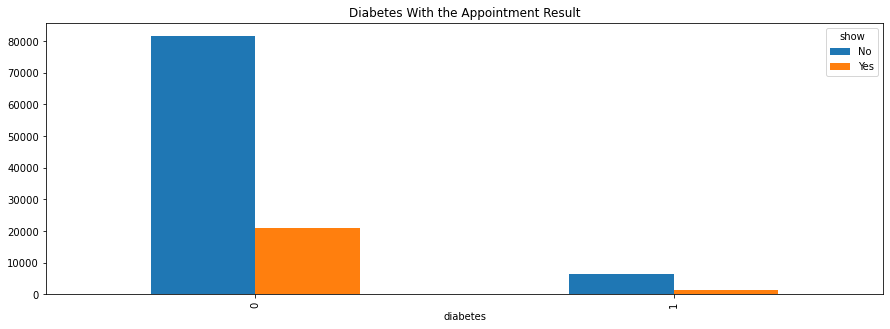

In [457]:
#getting the number of patients with diabetes who showed up and those that did not
df_noshow.groupby (['diabetes'])['show'].value_counts().unstack().plot(kind ='bar', title ='Diabetes With the Appointment Result', figsize =(15,5) );

The number of patients with diabetes is 7,943 out of which only 1,430 made it to their appointment.

### Alcololism

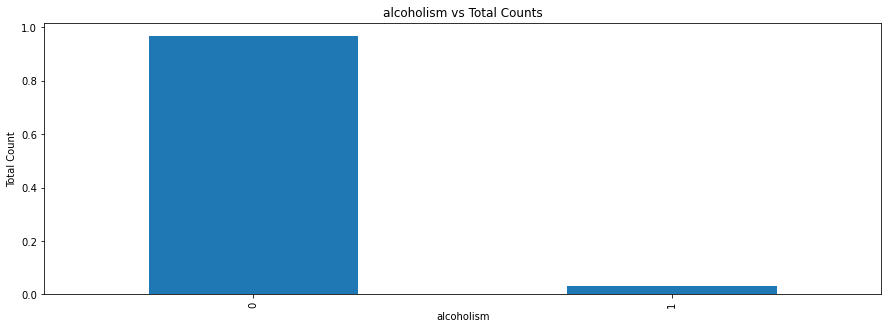

In [458]:
#getting the total number of alcoholics on the dataset, using the bar_plot function
bar_plot(['alcoholism'])


In [459]:
#getting the number of aloholics who showed up fr their appointment
df_noshow.groupby(['alcoholism']) ['show'].value_counts()

alcoholism  show
0           No      85525
            Yes     21642
1           No       2683
            Yes       677
Name: show, dtype: int64

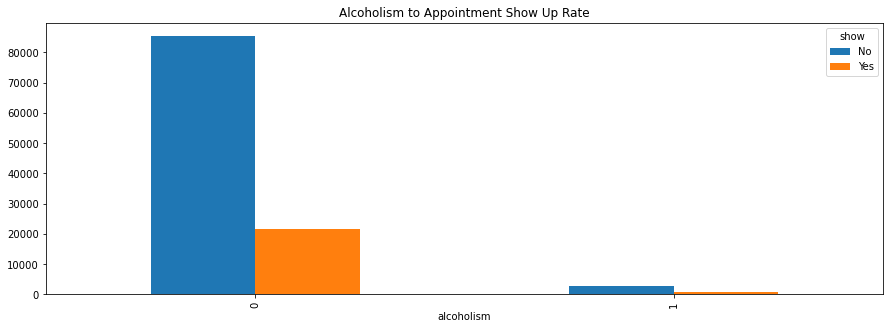

In [460]:
#plotting
df_noshow.groupby(['alcoholism']) ['show'].value_counts().unstack(). plot(kind = 'bar', title = 'Alcoholism to Appointment Show Up Rate', figsize = (15,5));

The total number of alcoholics in dataset is 3360, out of which only 677 patients made it to their appointment.

##  What number by age with diabetes were a show/no show for their appointment?

In [461]:
#getting the number of diabetic patients accoriding to age groups
df_noshow.groupby(['diabetes']) ['age_group'].value_counts()

diabetes                  
0         youth 18-37         26918
          children 0-18       25276
          middle_age 37-55    24889
          senior 55-115       21961
1         senior 55-115        5543
          middle_age 37-55     2017
          youth 18-37           332
          children 0-18          51
Name: age_group, dtype: int64

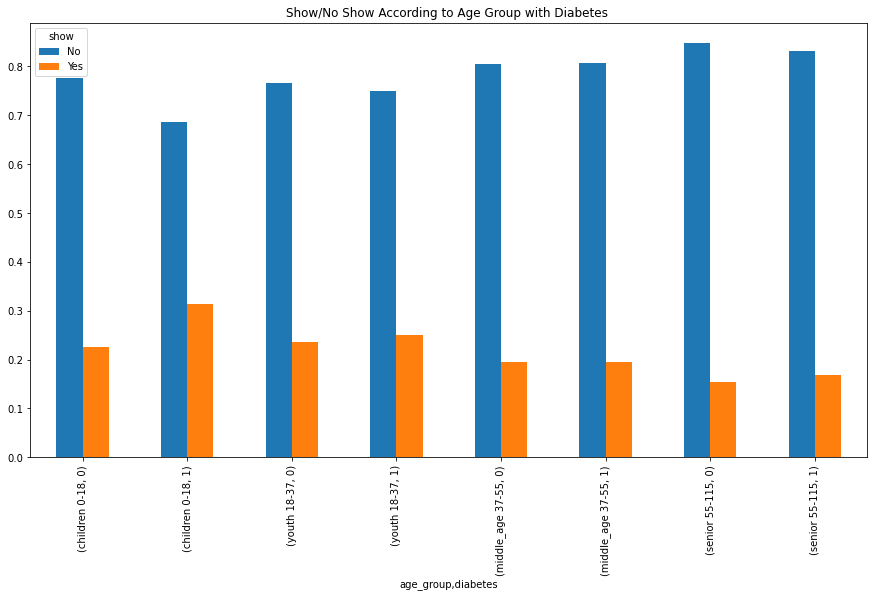

In [462]:
#getting the number of diabetic patients within age groups who showed for the appointment
df_noshow.groupby (['age_group','diabetes'])['show'].value_counts(normalize = True).unstack().plot(kind ='bar', title = 'Show/No Show According to Age Group with Diabetes ', figsize = (15,8));

The highest number of diabetic patients who showed for their appointments were in the children category (0-18). 

With the least number of diabetic patients showing up for their appointments being seniors (55-115).

## What propotion of patients who received scolarship showed up for appointment

In [463]:
#getting the number of patients who received scholarship
df_noshow.groupby(['scholarship'])['show'].value_counts()


scholarship  show
0            No      79925
             Yes     19741
1            No       8283
             Yes      2578
Name: show, dtype: int64

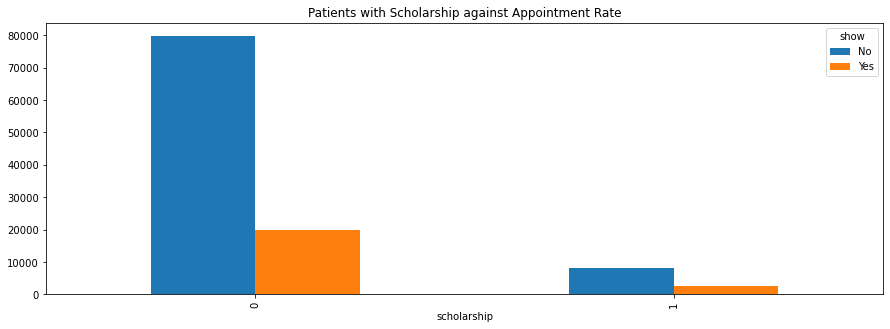

In [464]:
#plotting the chart
df_noshow.groupby(['scholarship'])['show'].value_counts().unstack().plot(kind = 'bar', title ='Patients with Scholarship against Appointment Rate', figsize = (15,5) );

The number of patients with scholarships who showed for their appointment is lower than those who showed up and did not have a scholarship.

<a id='conclusions'></a>
## Conclusions

> The dataset had a total of 110527 samples, out of which only 22,319 patients showed up for their appointment. This translates to only 20.19% Appointment Show Up rate.

> In this 20.19%, there were more females than males.

> Majoriity of those who showed up for their appointments fall in the agegroup youth (18 -37 years)

>The total number of alcoholics in dataset is 3360, out of which only 677 patients made it to their appointment.

>The number of patients with diabetes is 7,943 out of which only 1,430 made it to their appointment.

>The number of patients with scholarships (10,856) who showed for their appointment (2,578) is lower than those who showed up and did not have a scholarship (19,741)

>From the analysis, the limitation experienced was that all the categorical variables with relation to the show/no show rate looked very similar, and it is hard to tell what variable has a huge impact on the appointment attenndance. It is therefore recommended that the dataset be further analysed using prescriptive analysis models.
